### Comparison of the coherence metric between the original and surrogate data

In [74]:
import sys
sys.path.insert(1, '/home/vinicius/storage1/projects/GrayData-Analysis')

import time
import scipy
import h5py
import numpy                 as     np
import xarray                as     xr
import pandas                as     pd
import matplotlib.pyplot     as     plt
import seaborn               as     sns
from   tqdm                  import tqdm
from   xfrites.conn.conn_coh import conn_coherence_wav

from GDa.session             import session_info, session
from GDa.signal.surrogates   import trial_swap_surrogates, phase_rand_surrogates
from GDa.temporal_network    import temporal_network
from GDa.net.layerwise       import *

#### Load coherence data

In [2]:
#### Original data
net =  temporal_network(coh_file='super_tensor.nc', monkey='lucy', 
                        session=1, date='150128', trial_type=[1],
                        behavioral_response=[1], wt=(20,20), drop_trials_after=True,
                        relative=True, verbose=True, q=None, keep_weights=False)

In [3]:
#### Surrogate data
#net_surr = []
#for i in tqdm( range(11) ):
#    net_surr += [temporal_network(coh_file=f'super_tensor_{i}.nc', monkey='lucy', 
#                            session=1, date='150128', trial_type=[1], coh_thr=None,
#                            behavioral_response=[1], wt=(20,20), drop_trials_after=True,
#                            relative=None, verbose=True, q=None, keep_weights=False)]

100%|██████████| 11/11 [04:41<00:00, 25.60s/it]


#### KS-test

In [ ]:
coh      = net.super_tensor.values
#coh_surr = []
#for i in tqdm( range(11) ):
#    coh_surr.append(net_surr[i].super_tensor.values)
#coh_surr = np.stack(coh_surr, axis=0)

In [8]:
from scipy.stats import ks_2samp

In [9]:
#### Loading data
#coh      = xr.load_dataarray('data/coh_orig.nc')
#coh_surr = xr.load_dataarray('data/coh_surr.nc')
#to_netcdf('data/coh_orig.nc')

In [14]:
def ks_test(s_idx, verbose=False, n_jobs=1):
    
    from frites.utils import parallel_func
    
    net_surr = temporal_network(coh_file=f'super_tensor_{s_idx}.nc', monkey='lucy', 
                                session=1, date='150128', trial_type=[1], coh_thr=None,
                                behavioral_response=[1], wt=(20,20), drop_trials_after=True,
                                relative=None, verbose=True, q=None, keep_weights=False)
    coh_surr = net_surr.super_tensor.values
    
    def _for_band(band):
        ks = np.zeros(coh.shape[0])
        for i in range( coh.shape[0] ):
            ks[i] = ks_2samp(coh[i,band,...].flatten(),coh_surr[i,band,...].flatten(), alternative='two-sided')[1]
        return ks
    # define the function to compute in parallel
    parallel, p_fun = parallel_func( _for_band, n_jobs=n_jobs, 
                                     verbose=verbose, total=coh.shape[1]
                                   )
    ks = parallel(p_fun(band) for band in range(coh.shape[1]))
    return ks

In [17]:
ks = []
for i in range(11):
    ks += [ks_test(i,True,-1)]

  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


  0%|          |  : 0/5 [00:00<?,       ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [19]:
ks_m = np.mean(ks,0)

In [35]:
# p-values
p = 1e-10

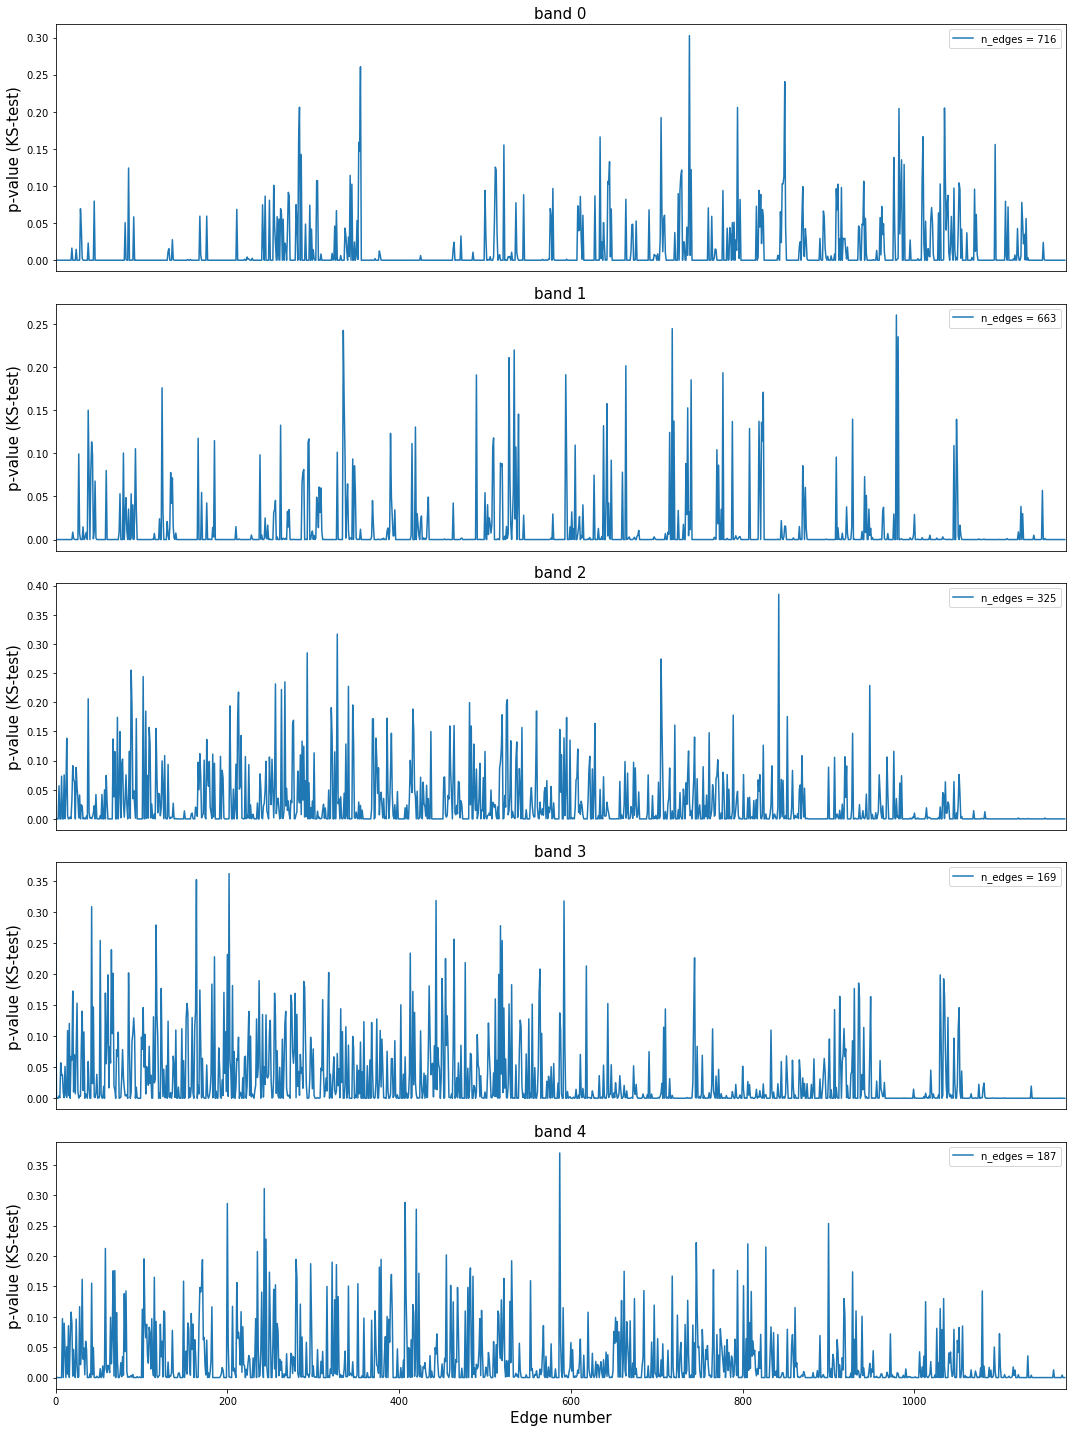

In [36]:
plt.figure(figsize=(15,20))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(ks_m[i], label=f'n_edges = {np.sum(ks_m[i]<p)}')
    plt.ylabel('p-value (KS-test)', fontsize=15)
    if i == 4: plt.xlabel('Edge number', fontsize=15)
    else: plt.xticks([])
    plt.title(f'band {i}', fontsize=15)
    plt.xlim([0,ks_m[i].shape[0]])
    plt.legend()
plt.tight_layout()
plt.savefig('img/ks_test.png', dpi=200)

In [37]:
x_s, x_t = net.super_tensor.attrs['sources'], net.super_tensor.attrs['targets']
ks_mat = np.zeros((5,net.super_tensor.attrs['nC'],net.super_tensor.attrs['nC']))
for i in range(5):
    idx         = ks_m[i] <p
    x_s_i,x_t_i = x_s[idx], x_t[idx]
    ks_mat[i,x_s_i,x_t_i] = ks_mat[i,x_t_i,x_s_i] = 1

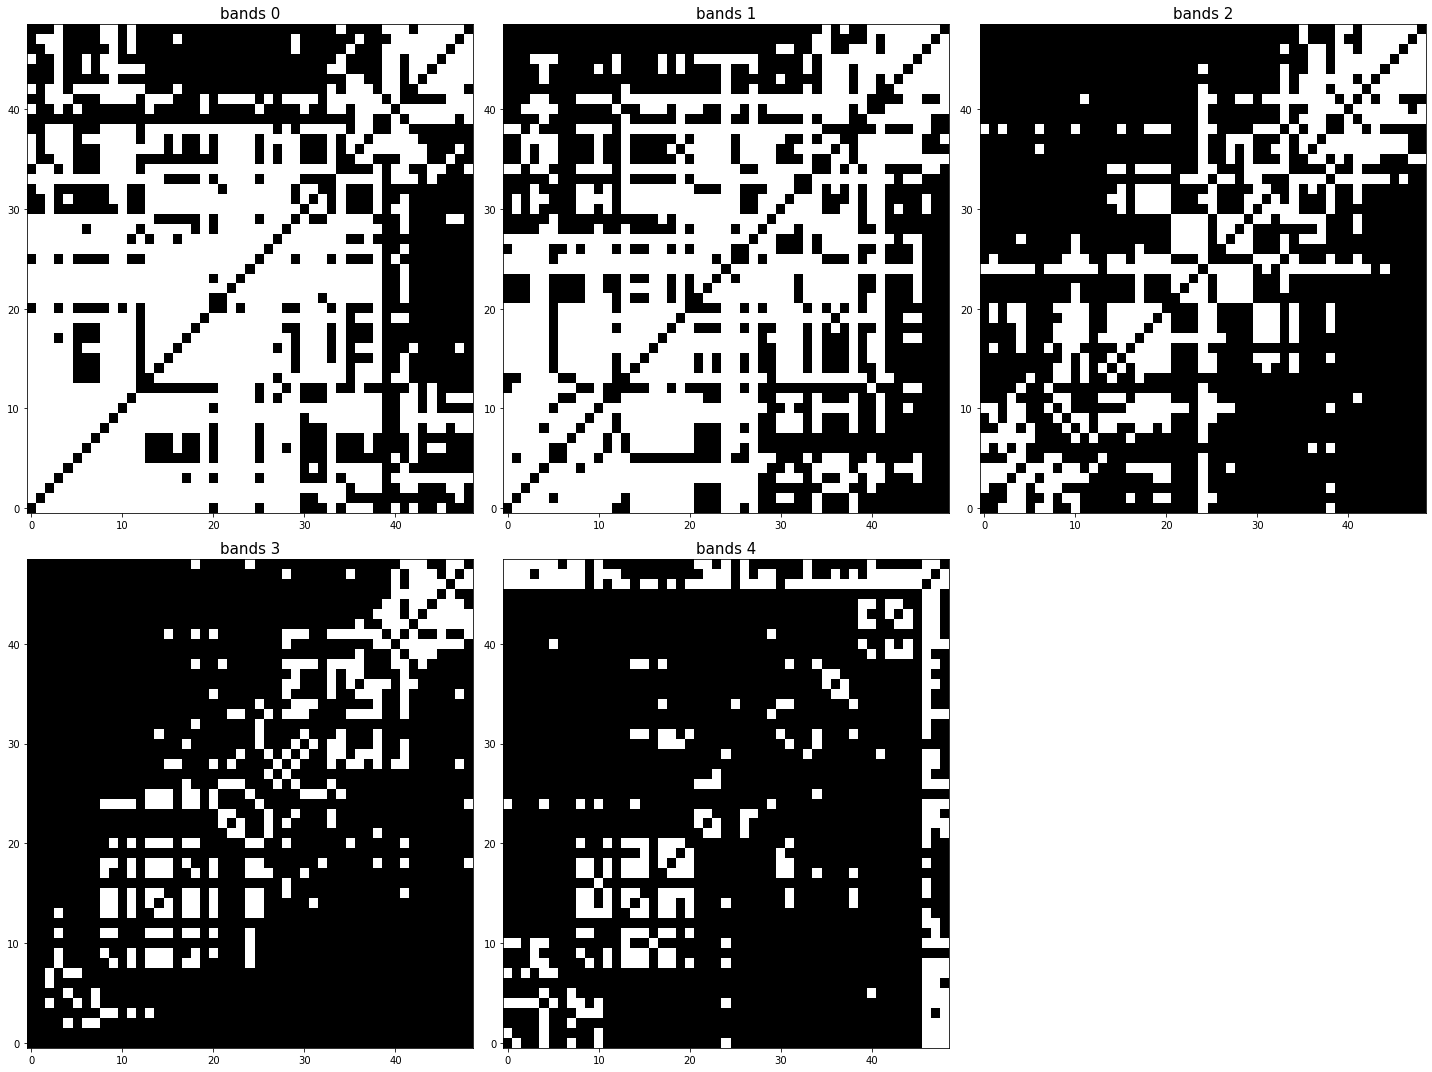

In [38]:
plt.figure(figsize=(20,15))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(ks_mat[i], aspect='auto', origin = 'lower', cmap='gray')
    #plt.xticks(range(data.sizes['roi']), data.roi.values, rotation=270)
    #plt.yticks(range(data.sizes['roi']), data.roi.values)
    plt.title(f'bands {i}', fontsize=15)
plt.tight_layout()

#### Checking a few histograms with p<1e-10

In [ ]:
coh_surr = []
for i in tqdm( range(11) ):
    net_surr = temporal_network(coh_file=f'super_tensor_{i}.nc', monkey='lucy', 
                                session=1, date='150128', trial_type=[1], coh_thr=None,
                                behavioral_response=[1], wt=(20,20), drop_trials_after=True,
                                relative=None, verbose=True, q=None, keep_weights=False)
    
    coh_surr.append(net_surr.super_tensor.values)

In [40]:
# Edges with signigicative coherence for all bands
idx = (ks_m[0]<p)*(ks_m[1]<p)*(ks_m[2]<p)*(ks_m[3]<p)*(ks_m[4]<p)

In [62]:
# Sample four edge indexes
ei  = np.sort( np.random.choice( np.where(idx==True)[0], 4) )

100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


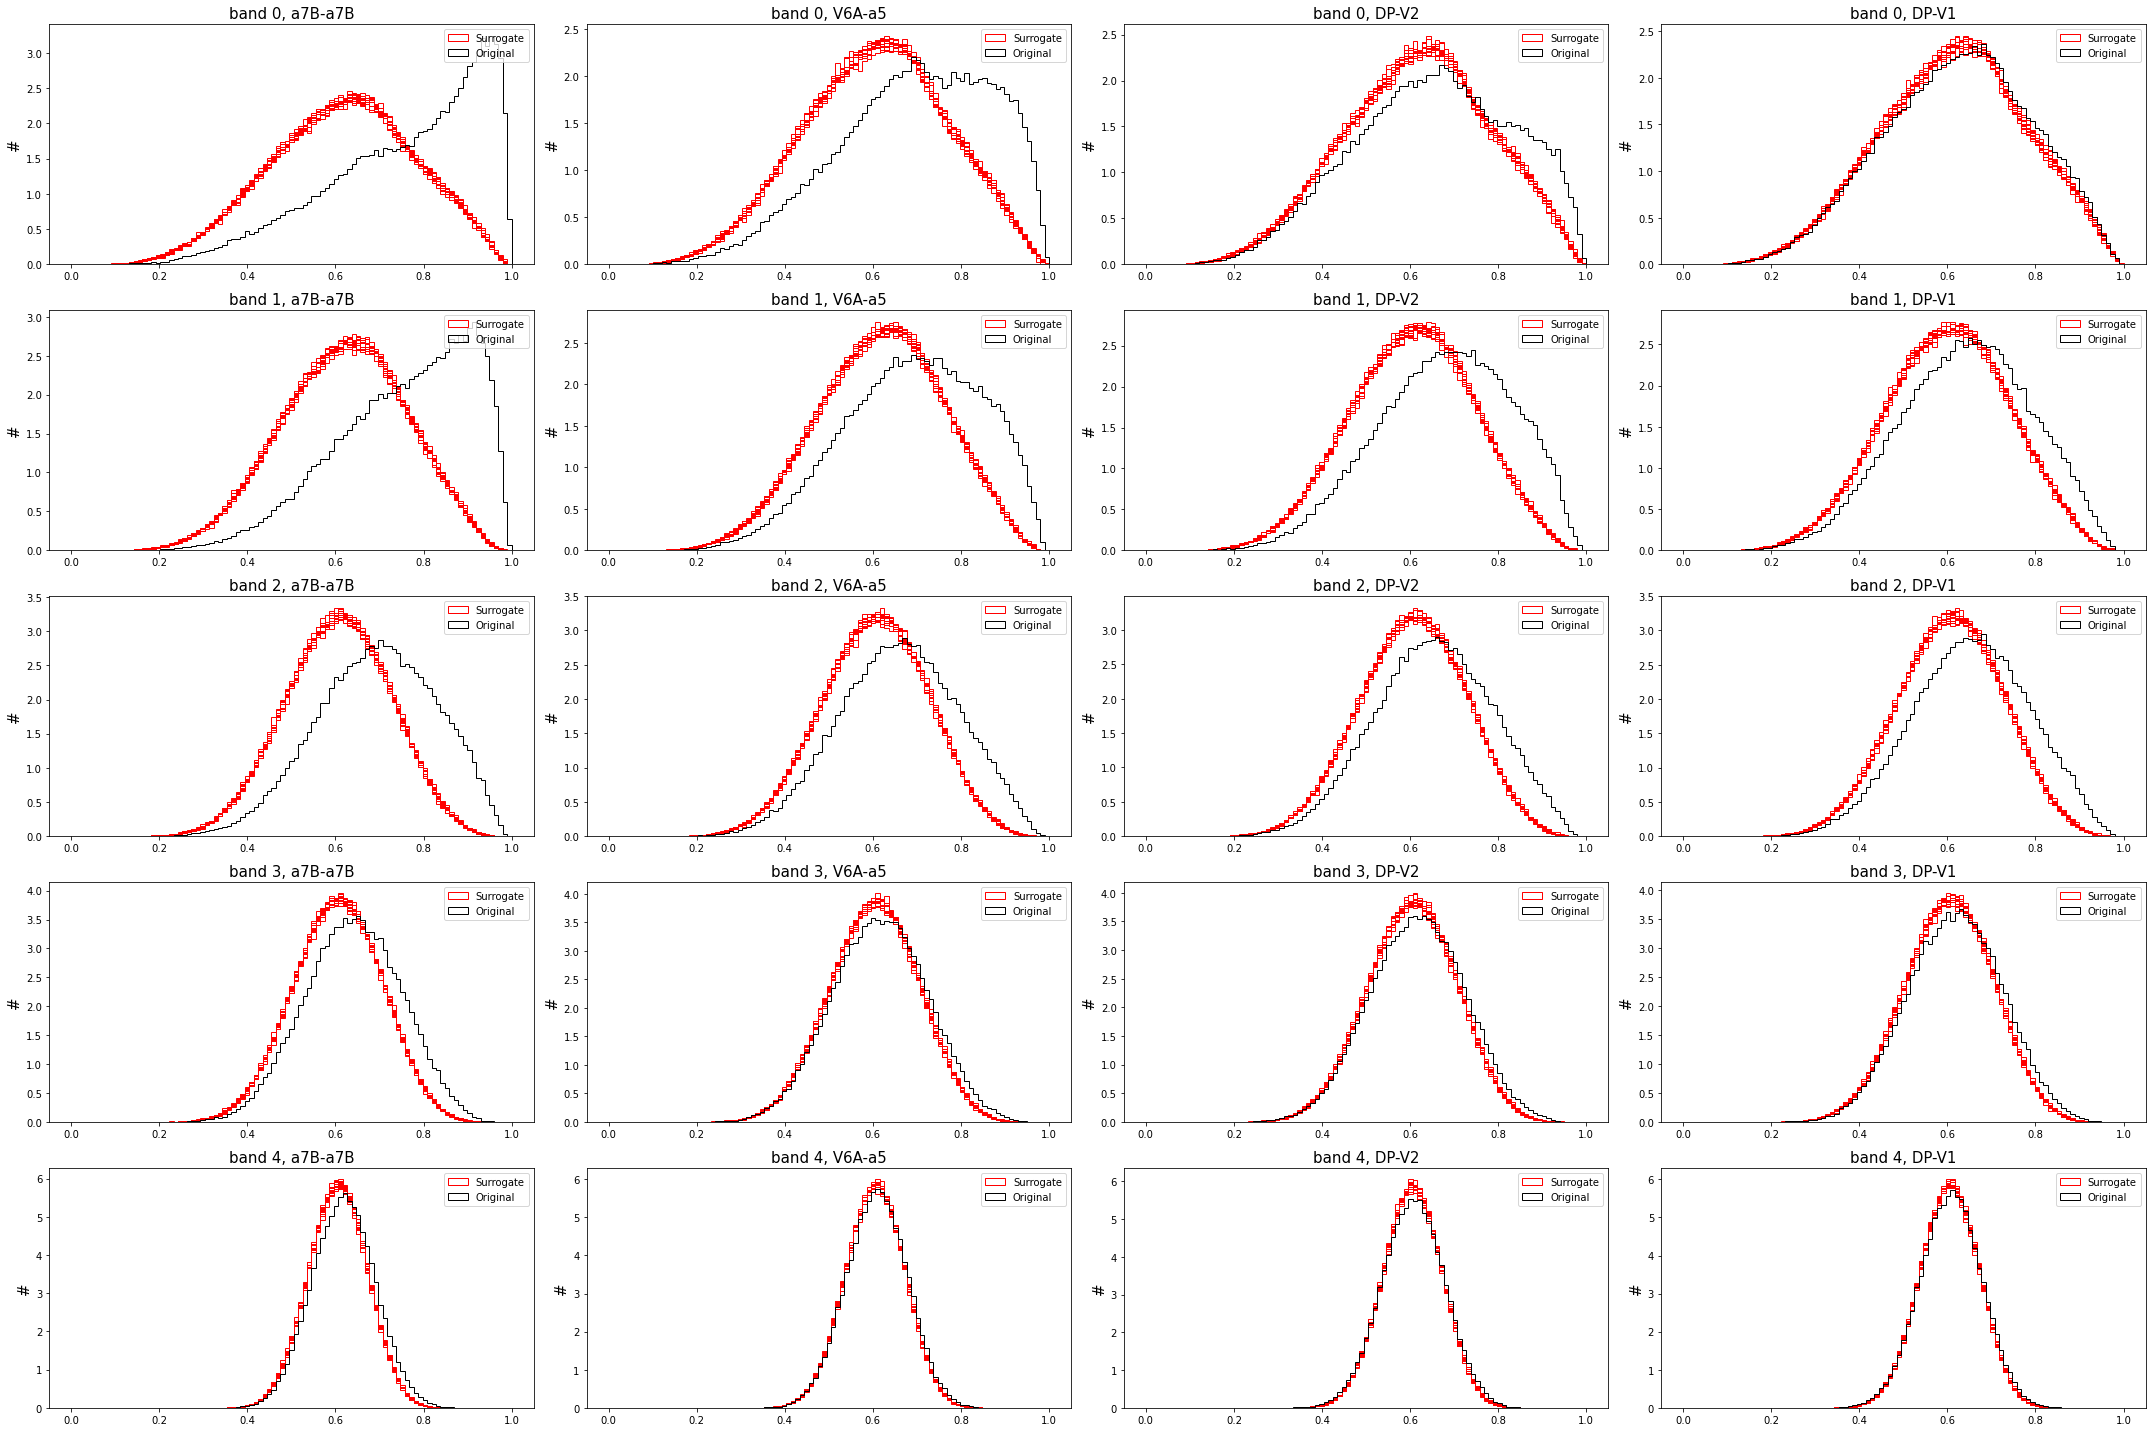

In [188]:
# Saving distributions for trial shuffling surrogates
bins = np.linspace(0,1,100)
count = 1
plt.figure(figsize=(30,20))
for i in tqdm( range(net.super_tensor.sizes['freqs']) ):
    for r in ei:#tqdm( range(coh.sizes['roi']) ):
        plt.subplot(net.super_tensor.sizes['freqs'],len(ei),count)
        for s in range(11):
            if s==0: plt.hist(coh_surr[s][r,i,...].flatten(), bins=bins, density=True, histtype='step', fill=False, color='r', label='Surrogate');
            else:    plt.hist(coh_surr[s][r,i,...].flatten(), bins=bins, density=True, histtype='step', fill=False, color='r')
        plt.hist( coh[r,i,...].flatten(), bins=bins,  density=True, histtype='step', fill=False, color='k', label='Original', lw=1);
        plt.title(f'band {i}, {net.super_tensor.roi.values[r]}', fontsize=15)
        plt.ylabel('#', fontsize=15) 
        plt.legend()
        count += 1
plt.tight_layout()

In [190]:
#### Saving all histograms
bins = np.linspace(0,1,100)
for r in tqdm( range(net.super_tensor.sizes['roi']) ):
    plt.figure(figsize=(8,15))
    count = 1
    for i in range(5):
        plt.subplot(5,1,count)
        for j in range(11):
            if j==0:
                plt.hist(coh_surr[j][r,i,...].flatten(), bins=bins, density=True, histtype='step', fill=False, color='r', label='Surrogate');
            else:
                plt.hist(coh_surr[j][r,i,...].flatten(), bins=bins, density=True, histtype='step', fill=False, color='r');
        plt.hist( coh[r,i,...].flatten(), bins=bins,  density=True, histtype='step', fill=False, color='k', label='Original', lw=1);
        plt.title(f'band {i}', fontsize=15)
        plt.ylabel('#', fontsize=15) 
        plt.legend()
        count += 1
    plt.tight_layout()
    plt.title(f'band {i}, {net.super_tensor.roi.values[r]}', fontsize=15)
    plt.savefig(f'img/surr_dist_roi{r}.png')
    plt.close()

100%|██████████| 1176/1176 [16:31<00:00,  1.19it/s]


### Meta-Connectivity (Original vs. Surrogate)

In [88]:
stages = ['baseline','cue','delay','match']

#### Original 

In [89]:
#### Instantiate a temporal network object without thresholding the data
net =  temporal_network(coh_file='super_tensor.nc', monkey='lucy', 
                        session=1, date='150128', trial_type=[1],
                        behavioral_response=[1], wt=(20,20), drop_trials_after=True,
                        relative=True, verbose=True, q=None, keep_weights=False)

In [90]:
CCij = np.zeros([len(net.freqs), net.super_tensor.sizes['roi'],net.super_tensor.sizes['roi'],len(stages)])

for s in tqdm( range(len(stages)) ):
    aux = net.get_data_from(stage=stages[s],pad=False)
    for b in range(len(net.freqs)):
        CCij[b,:,:,s] = np.corrcoef(aux[:,b,:].values, rowvar=True) 
CCij[:,range(1176),range(1176),:] = 0

100%|██████████| 4/4 [00:15<00:00,  3.78s/it]


In [91]:
p_mc, m_mc = [], []
for band in tqdm( range(len(net.freqs)) ):
    p, m  = compute_network_partition(CCij[band,:,:,None,:], kw_louvain=dict(qtype='sta',seed=0), backend='brainconn',verbose=False)
    p_mc += [p]
    m_mc += [m]
p_mc = xr.concat(p_mc, dim='freqs')
m_mc = xr.concat(m_mc, dim='freqs')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

 20%|██        | 1/5 [00:02<00:10,  2.51s/it]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

 40%|████      | 2/5 [00:04<00:06,  2.31s/it]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

 60%|██████    | 3/5 [00:07<00:04,  2.38s/it]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

 80%|████████  | 4/5 [00:09<00:02,  2.32s/it]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

100%|██████████| 5/5 [00:11<00:00,  2.27s/it]


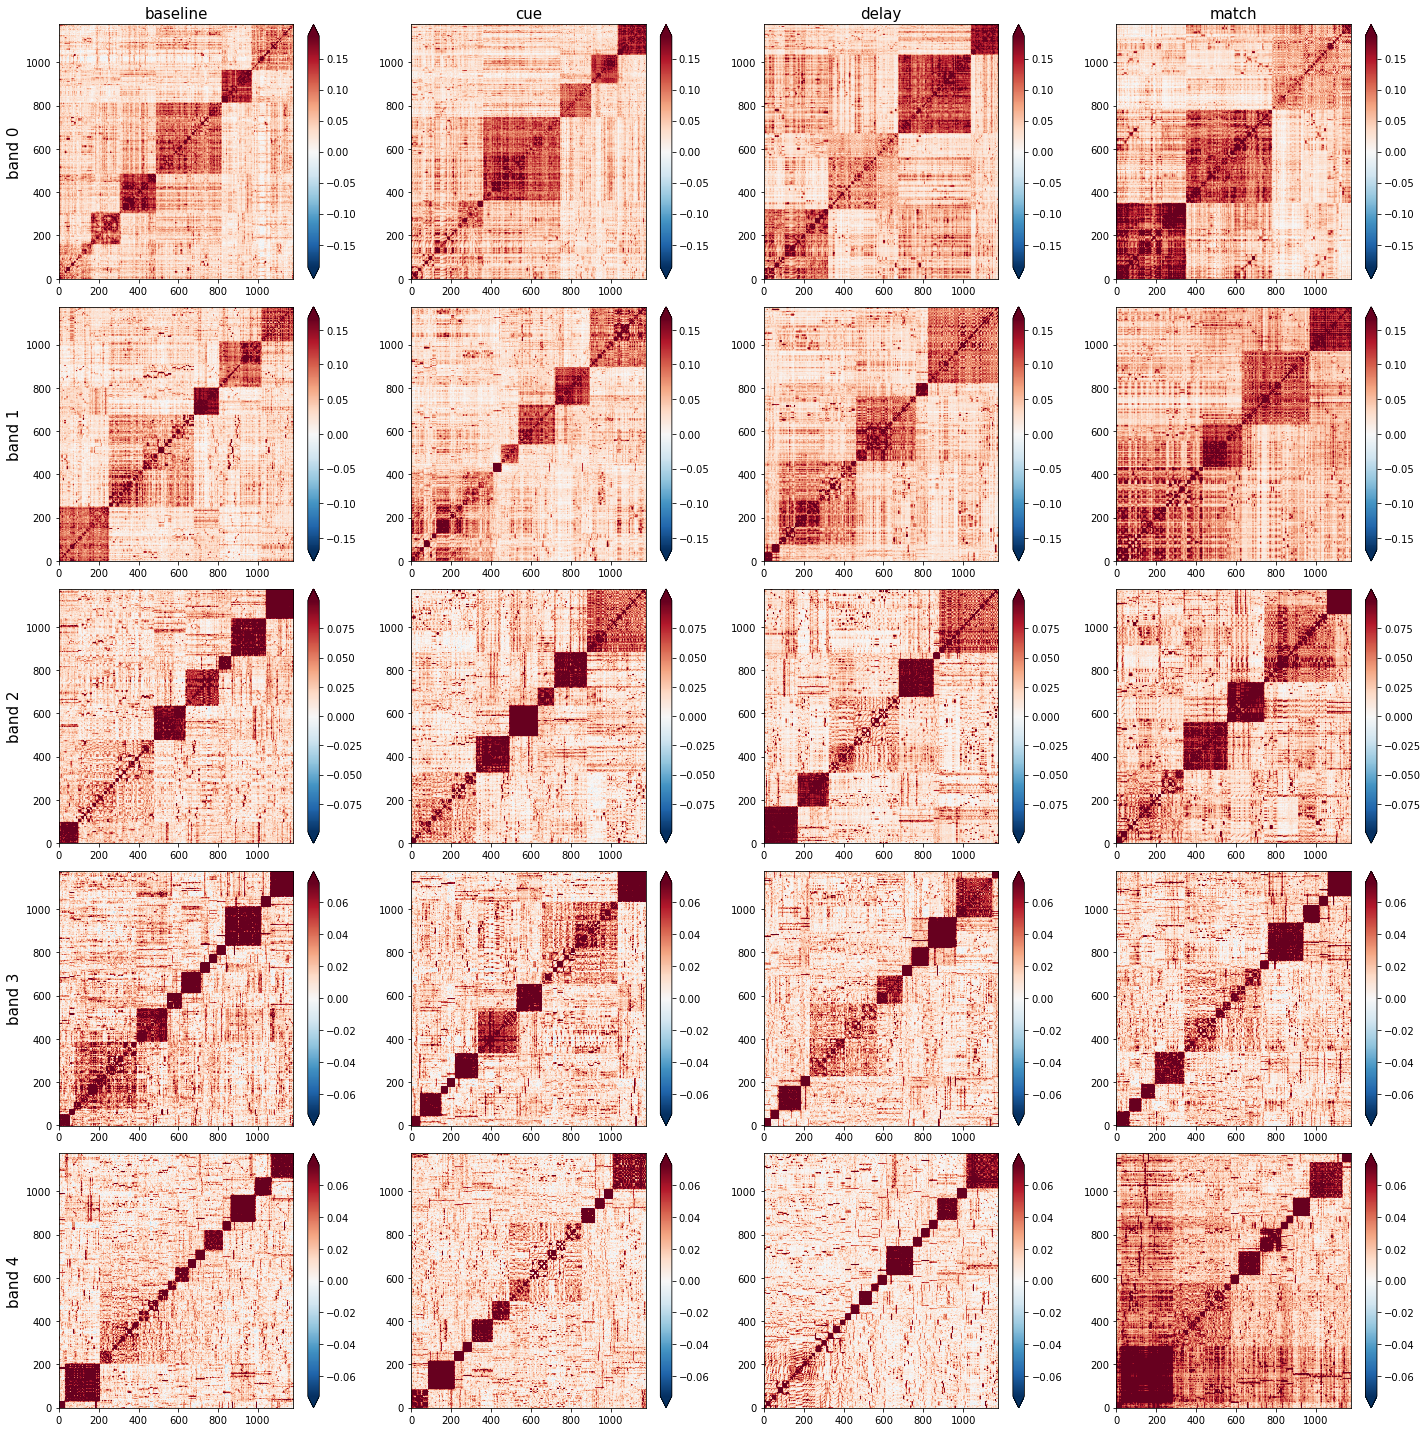

In [98]:
plt.figure(figsize=(20,20))
count = 1
for b in range(len(net.freqs)):
    for i in range(len(stages)):
        plt.subplot(len(net.freqs),len(stages),count)
        # Sorting by module label
        idx   = np.argsort( p_mc.isel(trials=0,times=i,freqs=b) )
        A     = CCij[b,...,i]
        plt.imshow(A[np.ix_(idx,idx)], aspect='auto', cmap='RdBu_r', origin='lower', 
                   vmin=-CCij[b,...].mean()*3, vmax=CCij[b,...].mean()*3)
        if b == 0: plt.title(stages[i], fontsize=15)
        if i == 0: plt.ylabel(f'band {b}', fontsize=15)
        plt.colorbar(extend='both')
        count+=1
plt.savefig('img/mc_orig.png')
plt.tight_layout()

#### Surrogate

In [110]:
s_idx = 10

In [111]:
#### Instantiate a temporal network object without thresholding the data
net_surr = temporal_network(coh_file=f'super_tensor_{s_idx}.nc', monkey='lucy', 
                        session=1, date='150128', trial_type=[1],
                        behavioral_response=[1], wt=(20,20), drop_trials_after=True,
                        relative=True, verbose=True, q=None, keep_weights=False)

In [112]:
CCij_surr = np.zeros([len(net_surr.freqs), net_surr.super_tensor.sizes['roi'],net_surr.super_tensor.sizes['roi'],len(stages)])

for s in tqdm( range(len(stages)) ):
    aux = net_surr.get_data_from(stage=stages[s],pad=False)
    for b in range(len(net.freqs)):
        CCij_surr[b,:,:,s] = np.corrcoef(aux[:,b,:].values, rowvar=True) 
CCij_surr[:,range(1176),range(1176),:] = 0

100%|██████████| 4/4 [00:14<00:00,  3.67s/it]


In [113]:
p_mc_surr, m_mc_surr = [], []
for band in tqdm( range(len(net_surr.freqs)) ):
    p, m  = compute_network_partition(CCij_surr[band,:,:,None,:], kw_louvain=dict(qtype='sta',seed=0), backend='brainconn',verbose=False)
    p_mc_surr += [p]
    m_mc_surr += [m]
p_mc_surr = xr.concat(p_mc_surr, dim='freqs')
m_mc_surr = xr.concat(m_mc_surr, dim='freqs')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

 20%|██        | 1/5 [00:02<00:09,  2.28s/it]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

 40%|████      | 2/5 [00:04<00:06,  2.33s/it]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

 60%|██████    | 3/5 [00:07<00:04,  2.44s/it]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

 80%|████████  | 4/5 [00:09<00:02,  2.33s/it]

  0%|          |  : 0/4 [00:00<?,       ?it/s]

100%|██████████| 5/5 [00:12<00:00,  2.42s/it]


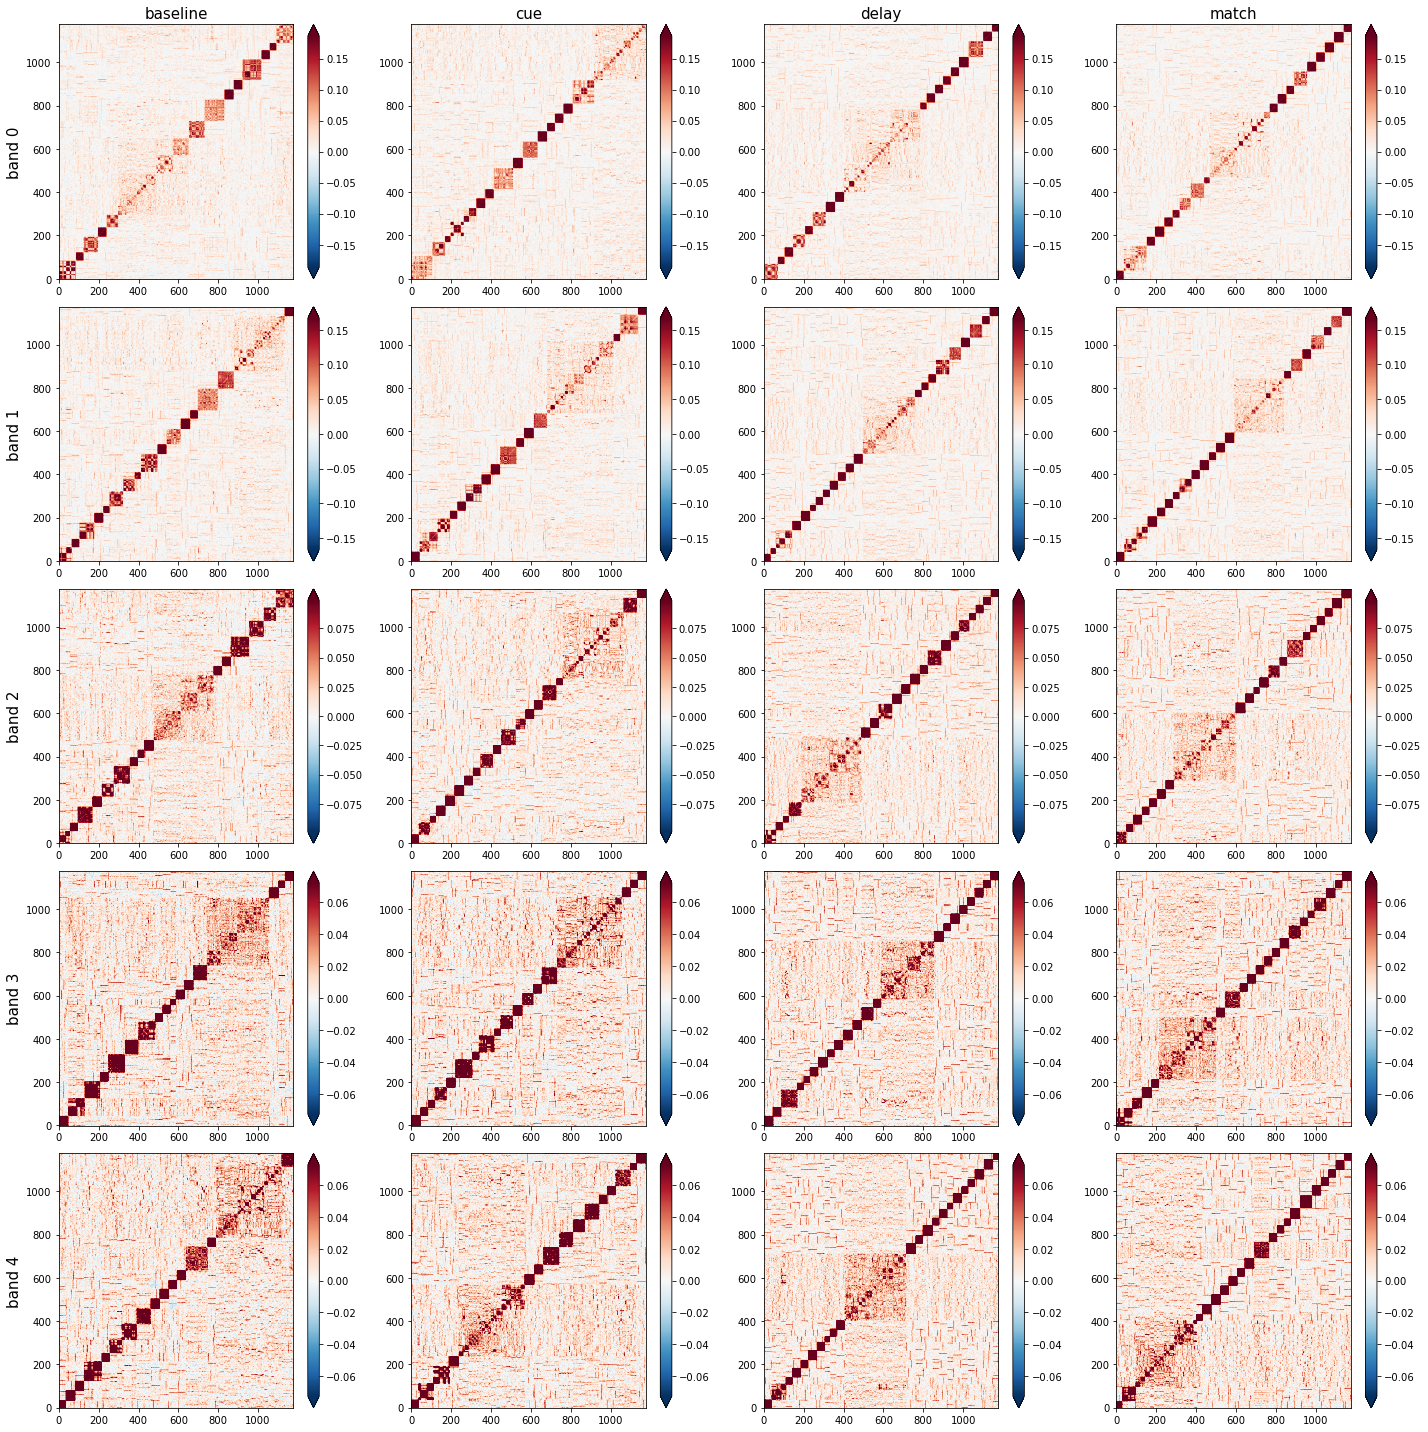

In [114]:
plt.figure(figsize=(20,20))
count = 1
for b in range(len(net_surr.freqs)):
    for i in range(len(stages)):
        plt.subplot(len(net_surr.freqs),len(stages),count)
        # Sorting by module label
        idx   = np.argsort( p_mc_surr.isel(trials=0,times=i,freqs=b) )
        A     = CCij_surr[b,...,i]
        plt.imshow(A[np.ix_(idx,idx)], aspect='auto', cmap='RdBu_r', origin='lower', 
                   vmin=-CCij[b,...].mean()*3, vmax=CCij[b,...].mean()*3)
        if b == 0: plt.title(stages[i], fontsize=15)
        if i == 0: plt.ylabel(f'band {b}', fontsize=15)
        plt.colorbar(extend='both')
        count+=1
plt.savefig(f'img/mc_surr_{s_idx}.png')
plt.tight_layout()